In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

DATASET

In [2]:
# Custcat dataset
df = pd.read_csv("./teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
# Number of entries in each class
df["custcat"].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

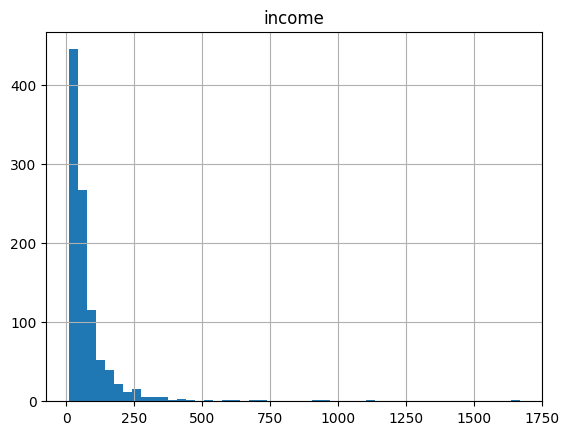

In [6]:
# Histogram of income column
df.hist(column = "income", bins = 50)

In [7]:
# Features set (all columns)
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [9]:
# Features values
x = df[["region", "tenure", "age", "marital", "address", "income", "ed", "employ", "retire", "gender", "reside"]].values
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [10]:
# Labels values
y = df["custcat"].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

CREATE 80% TRAINING SET & 20% TESTING SET

In [11]:
# Standardize data
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [14]:
from sklearn.model_selection import train_test_split

# Split train set and test set
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 4)

print("Train set: ", xTrain.shape, yTrain.shape)
print("Test set: ", xTest.shape, yTest.shape)


Train set:  (800, 11) (800,)
Test set:  (200, 11) (200,)


KNN Classification Model with sklearn

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Training
k = 4
model = KNeighborsClassifier(n_neighbors = k).fit(xTrain, yTrain)

# Model info
model

KNeighborsClassifier(n_neighbors=4)

In [19]:
# Predicting
prediction = model.predict(xTest)
prediction[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

Accuracy Evaluation

In [20]:
from sklearn import metrics

print("Train set accuracy: ", metrics.accuracy_score(yTrain, model.predict(xTrain)))
print("Test set accuracy: ", metrics.accuracy_score(yTest, prediction))

Train set accuracy:  0.5475
Test set accuracy:  0.32


K Selection in Range of 1 - 10

In [23]:
kRange = 10

# Array to store mean accuracy and std accuracy of each k
meanAccuracy = np.zeros((kRange - 1))
stdAccuracy = np.zeros((kRange - 1))

for k in range(1, kRange):
    # Train model and predict for each k
    model = KNeighborsClassifier(n_neighbors = k).fit(xTrain, yTrain)
    prediction = model.predict(xTest)

    meanAccuracy[k - 1] = metrics.accuracy_score(yTest, prediction)
    stdAccuracy[k - 1] = np.std(prediction == yTest)/np.sqrt(prediction.shape[0])

print("Mean accuracy array: ", meanAccuracy)
print("Std accuracy array: ", stdAccuracy)

Mean accuracy array:  [0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34 ]
Std accuracy array:  [0.0324037  0.03208582 0.03284623 0.03298485 0.03284623 0.03270321
 0.03337477 0.0331191  0.03349627]


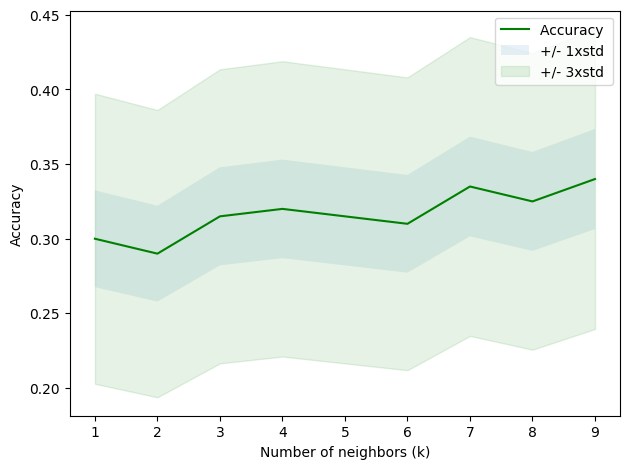

In [44]:
# Plot accuracy for each k
plt.plot(range(1, kRange), meanAccuracy, "g")
plt.fill_between(range(1, kRange), meanAccuracy - 1 * stdAccuracy, meanAccuracy + 1 * stdAccuracy, alpha = 0.1)
plt.fill_between(range(1, kRange), meanAccuracy - 3 * stdAccuracy, meanAccuracy + 3 * stdAccuracy, alpha = 0.1, color = "green")

plt.legend(("Accuracy ", "+/- 1xstd", "+/- 3xstd"))

plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors (k)")

plt.tight_layout()
plt.show()

In [47]:
# The best k
print("The best accuracy was ", meanAccuracy.max(), "with k = ", meanAccuracy.argmax() + 1)

The best accuracy was  0.34 with k =  9
